<a href="https://colab.research.google.com/github/tentamenaprimadellasafira/UAS_KECERDASAN-BUATAN/blob/main/STI202303511_TENTAMENA_PRIMA_DS_UAS_DL_DTS_STUDENT_GRADUATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d 'ranzeet013/student-graduation-dataset'

Dataset URL: https://www.kaggle.com/datasets/ranzeet013/student-graduation-dataset
License(s): DbCL-1.0
  0% 0.00/87.3k [00:00<?, ?B/s]
100% 87.3k/87.3k [00:00<00:00, 275MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/student-graduation-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

1. IMPORT LIBRARY

In [ ]:
# 1. Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


2. LOAD DATASET

In [ ]:
# 2. Load dataset
df = pd.read_csv('/content/graduation_dataset.csv')  # ganti sesuai nama file kamu
print("Sample data:\n", df.head())

Sample data:
    Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...   
1         

3. CEK MISSING VALUES

In [ ]:
# 3. Cek missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                 

4. ENCODE DATA KATEGORIKAL

In [ ]:
# 4. Encode data kategorikal
le = LabelEncoder()
# Check the actual column names in df.columns to replace 'scholarship' and 'graduated'
# Based on the dataframe head, 'Scholarship holder' seems to be the scholarship column and 'Target' is the graduation status.
df['Scholarship holder'] = le.fit_transform(df['Scholarship holder'])  # Assuming 'Scholarship holder' is the correct column
df['Target'] = le.fit_transform(df['Target'])      # Assuming 'Target' is the correct column

5. PISAHKAN FITUR DAN LABEL

In [ ]:
# 5. Pisahkan fitur dan label
# Based on the dataframe head and available columns, select relevant features.
# 'Target' is the label column.
X = df[['Scholarship holder', 'Age at enrollment', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Unemployment rate', 'Inflation rate', 'GDP']]
y = df['Target']

6. STANDARISASI DATA

In [ ]:
# 6. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

7. SPLIT DATA TRAINING DAN TESTING

In [ ]:
# 7. Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

8. MODEL

In [ ]:
# 8. Model: XGBoost (akurasi tinggi & cepat)
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:07:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

9. PREDIKSI DAN EVALUASI

In [ ]:
# 9. Prediksi dan evaluasi
y_pred = model.predict(X_test)

print("\n🔍 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred))

print("🎯 Akurasi:", accuracy_score(y_test, y_pred))


🔍 Confusion Matrix:
[[186  42  88]
 [ 48  31  72]
 [ 43  38 337]]

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.59      0.63       316
           1       0.28      0.21      0.24       151
           2       0.68      0.81      0.74       418

    accuracy                           0.63       885
   macro avg       0.54      0.53      0.53       885
weighted avg       0.61      0.63      0.61       885

🎯 Akurasi: 0.6259887005649718


10. VISUALISASI FITUR PENTING

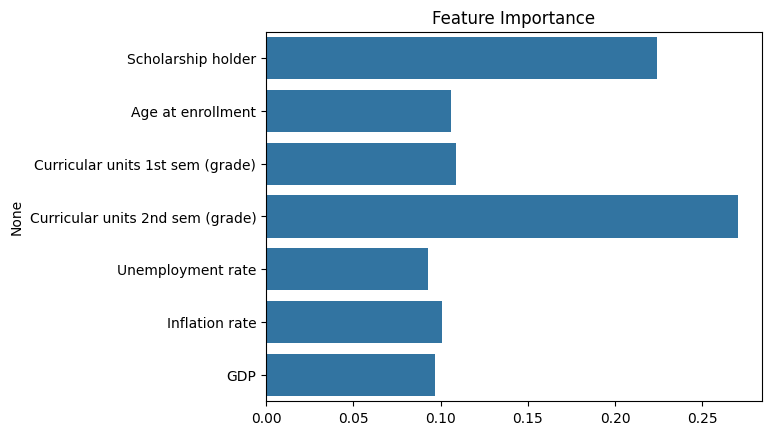

In [ ]:
# 10. Visualisasi fitur penting
importances = model.feature_importances_
feature_names = X.columns # Use the actual column names from the feature DataFrame
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.show()